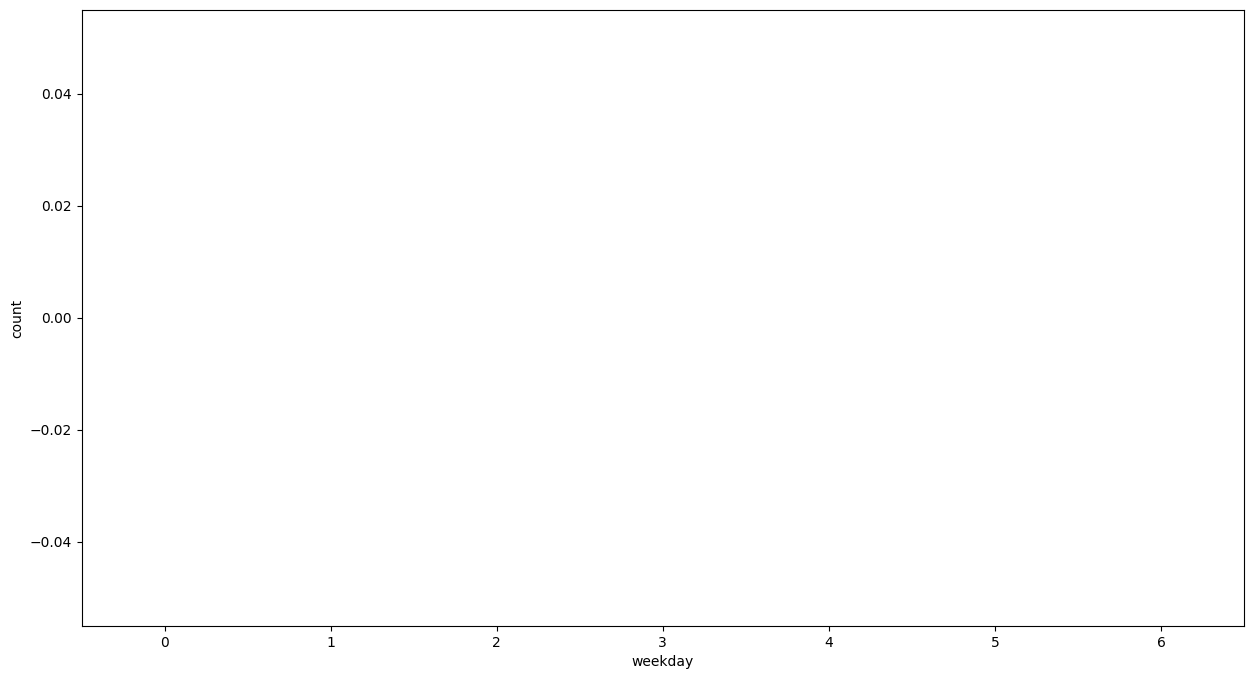

KeyError: "None of [Index(['State', 'Abbreviation'], dtype='object')] are in the [columns]"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych o interwencjach policji
df = pd.read_csv('fatal-police-shootings-data.csv')

# Przekształcenie tabeli w zestawienie liczby ofiar według rasy i oznak choroby psychicznej
df_mod = df.pivot_table(index=['race', 'signs_of_mental_illness'], values='id', aggfunc=len)
df_mod['percent'] = df_mod.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
df_mod.rename(columns={'id': 'count'}, inplace=True)
df_mod_sorted = df_mod.sort_values(by='percent', ascending=False)

# Dodanie kolumny z dniem tygodnia
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.day_name()

# Zliczenie interwencji według dnia tygodnia
df_weekday = df.groupby('weekday')['id'].count().reset_index()

# Ustawienie odpowiedniej kolejności dni tygodnia
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = df_weekday.reindex(cats).rename(columns={'id': 'count'})

# Wykres
plt.figure(figsize=(15, 8))
fig = sns.barplot(data=df_weekday, x='weekday', y='count')
plt.show()

# Wczytanie danych o populacji i skrótach stanów
abv_states = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)[0]
abv_states = abv_states[['State', 'Abbreviation']].sort_values(by='State')
states_dict = dict(zip(abv_states['State'], abv_states['Abbreviation']))

population_state = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')[0]
population_state = population_state[['State', 'Population estimate, July 1, 2019[2]']].rename(columns={"Population estimate, July 1, 2019[2]": 'population'})

# Połączenie danych o populacji i incydentach
population_state['state'] = population_state['State'].map(states_dict)
population_state['incidents'] = df.groupby('state')['id'].count().reset_index()['id']
population_state['indices_per_1000'] = (population_state['incidents'] / population_state['population']) * 1000
